In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import os # 파일 시스템 경로 작업을 위해 (CSV 파일 로드 시 유용)

# 데이터 분할 및 모델 선택 도구
from sklearn.model_selection import train_test_split, GridSearchCV

# 전처리 도구
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# 머신러닝 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 모델 평가 지표
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
import os
# 노트북 파일이 있는 폴더로 이동 (예시)
os.chdir(r'D:\whynot\githome')

# 변경 후 확인
print("변경 후:", os.getcwd())

변경 후: d:\whynot\githome


In [3]:
df = pd.read_csv('./data1/creditcard.csv', encoding='euc-kr')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df = df.drop('Time', axis =1)

In [6]:
df1 = df.drop('Class', axis =1)

In [7]:
pd.isnull(df).sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
y =df['Class']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df1, 
                 y, 
                 test_size= 0.2, 
                 random_state= 11)

In [10]:
scaler1 = StandardScaler()
scaler1.fit(x_train)
x_train_scaled = scaler1.transform(x_train)
x_test_scaled = scaler1.transform(x_test)

#  LogisticRegression

In [11]:
model1 = LogisticRegression(random_state= 11)
model1.fit(x_train_scaled, y_train)
pred1 = model1.predict(x_test_scaled)
accuracy_score(y_test, pred1)

0.9990871107053826

In [12]:
confusion_matrix(y_test, pred1)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.82      0.67      0.73       108

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



# DecisionTreeClassifier

In [13]:
model2 = DecisionTreeClassifier()
model2.fit(x_train_scaled, y_train)
pred2 = model2.predict(x_test_scaled)
accuracy_score(y_test, pred2)

0.9993504441557529

In [14]:
confusion_matrix(y_test, pred2)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.87      0.78      0.82       108

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# RandomForestClassifier

In [15]:
model3 = RandomForestClassifier(random_state=0, max_depth=8)
model3.fit(x_train_scaled, y_train)
pred3 = model3.predict(x_test_scaled)
accuracy_score(y_test, pred3)

0.9995084442259752

In [16]:
confusion_matrix(y_test, pred3)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.97      0.77      0.86       108

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# XGBoost

In [17]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Series → 1D array
y_test_encoded = le.transform(y_test)

In [18]:
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)
xgb_model.fit(x_train_scaled, y_train_encoded)
xgb_predictions = xgb_model.predict(x_test_scaled)
accuracy_score(y_test_encoded,xgb_predictions)

0.9995084442259752

In [19]:
confusion_matrix(y_test_encoded, xgb_predictions)
print(classification_report(y_test_encoded, xgb_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.94      0.79      0.86       108

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

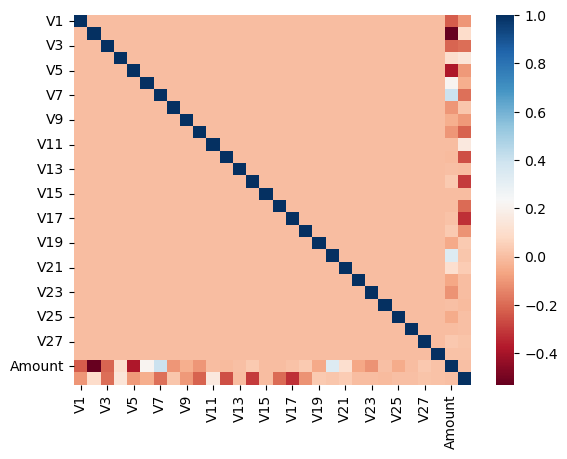

In [22]:
corr=df.corr()
sns.heatmap(corr, cmap='RdBu')

In [29]:
def get_outlier(df=None, column=None, weight=1.5):

    fraud = df[df['Class']==1][column]

    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight #lower
    highest_val = quantile_75 + iqr_weight #upper
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [27]:
outlier_index14 = get_outlier(df = df, column='V14', weight=1.5)
outlier_index14

Index([8296, 8615, 9035, 9252], dtype='int64')

In [30]:
outlier_index17 = get_outlier(df = df, column='V17', weight=1.5)
outlier_index17

Index([], dtype='int64')